In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/IPSL-CM5A2-INCA_diag_2014(0318).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [4]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 2.2*10**(-13)*np.exp(600/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 2.14*10**(-10)

data['o3prod_mole'] = data['o3prod']
data['o3loss_mole'] = data['o3loss']

data['lossch4_mole'] = data['lossch4']
data['lossco_mole'] = data['lossco']
data['k_ch3o2_ch3o2'] = 1.03*10**(-13)*np.exp(365/data['tas'])

In [5]:
data['k_no_ho2'].median()

8.571551227569579e-12

In [6]:
data['k_no_ch3o2'].median()

8.21211850643158e-12

In [7]:
data['k_o3_oh'].median()

6.126556284725666e-14

In [8]:
data['k_o3_ho2'].median()

1.797851070566387e-15

In [9]:
data['k_ch3o2_ch3o2'].median()

3.7431853389400414e-13

In [10]:
data['a'] = 2*data['k_ho2_ho2']
data['b'] = data['k_o3_ho2']*data['o3_mole'] + data['k_no_ho2']*data['no_mole']
data['c'] = -data['lossco_mole'] - data['k_o3_oh']*data['o3_mole']*data['oh_mole']

In [11]:
data['ho2_mole'] = (-data['b'] + np.sqrt(data['b']**2 - 4*data['a']*data['c']))/(2*data['a'])

In [12]:
data['lossco'].mean()

433075.70326380787

In [13]:
data['ho2_mole'].describe()

count    9.720000e+05
mean     7.816475e+07
std      8.685630e+07
min      2.092492e+03
25%      1.116001e+07
50%      4.432782e+07
75%      1.196820e+08
max      6.014305e+08
Name: ho2_mole, dtype: float64

In [14]:
data['oh_mole'].describe()

count    9.720000e+05
mean     9.724862e+05
std      1.092392e+06
min      8.187205e+00
25%      1.134230e+05
50%      5.851662e+05
75%      1.585218e+06
max      2.289215e+07
Name: oh_mole, dtype: float64

In [15]:
data['ratio_ho2_oh'] = data['ho2_mole']/data['oh_mole']
data['ratio_ho2_oh'].describe()

count    972000.000000
mean        159.670943
std         154.954236
min           0.390853
25%          58.477217
50%         130.402889
75%         210.612507
max        1466.740944
Name: ratio_ho2_oh, dtype: float64

In [16]:
data['P1'] = data['k_no_ho2']*data['no_mole']*data['ho2_mole']
data['P1_frac'] = data['P1']/data['o3prod_mole']
data['P1_frac'].describe()

count    972000.000000
mean          0.383222
std           0.211867
min           0.000363
25%           0.234491
50%           0.392250
75%           0.522386
max           1.515435
Name: P1_frac, dtype: float64

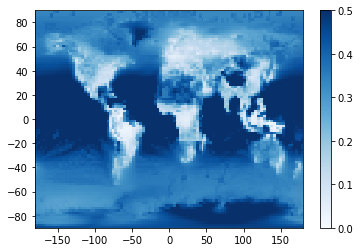

In [17]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P1_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [18]:
data_mean['P1_frac'].describe()

count    16200.000000
mean         0.383222
std          0.139599
min          0.019757
25%          0.313459
50%          0.364402
75%          0.471110
max          0.883822
Name: P1_frac, dtype: float64

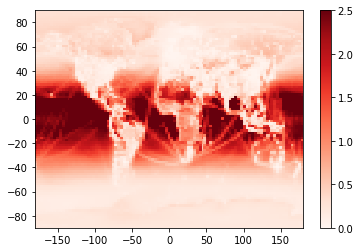

In [19]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ho2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=2.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [20]:
data = data.drop(['a','b','c'], axis=1)
data

,longitude,latitude,t,loc,o3,o3prod,o3loss,eminox,emivoc,tas,...,k_oh_no2,o3prod_mole,o3loss_mole,lossch4_mole,lossco_mole,k_ch3o2_ch3o2,ho2_mole,ratio_ho2_oh,P1,P1_frac
0,1.0,-89.0,1.0,911.0,1.112896e-08,43453.7800,29979.4260,0.000000e+00,0.000000e+00,245.66006,...,6.500000e-11,43453.7800,29979.4260,1.438867e+00,66282.48400,4.551022e-13,5.048696e+07,104.136986,36395.603854,0.837570
1,3.0,-89.0,1.0,2911.0,1.113095e-08,43206.9180,29742.9550,0.000000e+00,0.000000e+00,245.46959,...,6.500000e-11,43206.9180,29742.9550,1.436088e+00,66020.16400,4.556272e-13,5.028849e+07,103.487042,36311.495598,0.840409
2,5.0,-89.0,1.0,4911.0,1.113095e-08,43206.9180,29742.9550,0.000000e+00,0.000000e+00,245.46959,...,6.500000e-11,43206.9180,29742.9550,1.436088e+00,66020.16400,4.556272e-13,5.028849e+07,103.487042,36311.495598,0.840409
3,7.0,-89.0,1.0,6911.0,1.113436e-08,42965.9960,29509.3320,0.000000e+00,0.000000e+00,245.26491,...,6.500000e-11,42965.9960,29509.3320,1.433408e+00,65769.07000,4.561929e-13,5.008854e+07,102.781754,36239.036844,0.843435
4,9.0,-89.0,1.0,8911.0,1.113436e-08,42965.9960,29509.3320,0.000000e+00,0.000000e+00,245.26491,...,6.500000e-11,42965.9960,29509.3320,1.433408e+00,65769.07000,4.561929e-13,5.008854e+07,102.781754,36239.036844,0.843435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971995,-9.0,89.0,60.0,-8911.0,1.862602e-08,4275.3660,1351.6846,9.564082e-14,7.891430e-15,243.62012,...,6.500000e-11,4275.3660,1351.6846,5.829146e-18,593.31146,4.607996e-13,5.385743e+05,694.382017,200.035263,0.046788
971996,-7.0,89.0,60.0,-6911.0,1.862602e-08,4275.3660,1351.6846,9.564082e-14,2.050938e-15,243.62012,...,6.500000e-11,4275.3660,1351.6846,5.829146e-18,593.31146,4.607996e-13,5.385743e+05,694.382017,200.035263,0.046788
971997,-5.0,89.0,60.0,-4911.0,1.860374e-08,3114.9426,1375.8046,1.464548e-14,0.000000e+00,243.73741,...,6.500000e-11,3114.9426,1375.8046,5.823773e-18,605.01666,4.604675e-13,7.473813e+05,943.450725,53.225640,0.017087
971998,-3.0,89.0,60.0,-2911.0,1.860374e-08,3114.9426,1375.8046,1.464548e-14,8.804016e-16,243.73741,...,6.500000e-11,3114.9426,1375.8046,5.823773e-18,605.01666,4.604675e-13,7.473813e+05,943.450725,53.225640,0.017087


In [22]:
data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/IPSL-CM5A2-INCA_diag_2014(0319).csv', index = False)